## What is convolution

* Convolution is an imortant operation from signal processing and analysis
* Think of your favorite audio effect - let's say it is an "echo"
* All effects can be thought of as filters, or what we call them in machine learning sometimes, kernels - we will call it h(t) or w(t)

## Motivation
### Guassian Blur

In [16]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

print(6/4)
print(6//4)

1.5
1


(512, 512, 3)


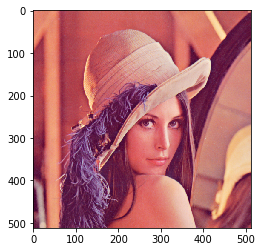

In [6]:
img = mpimg.imread("../data/cnn/lena.png")
print(img.shape)
plt.imshow(img)
plt.show()

(512, 512)


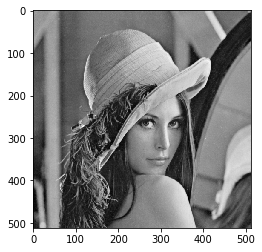

In [8]:
bw = img.mean(axis=2)
print(bw.shape)
plt.imshow(bw, cmap='gray')
plt.show()

(20, 20)


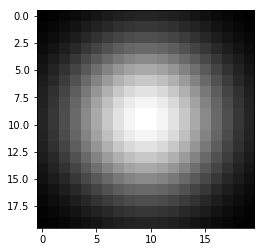

In [9]:
W = np.zeros((20, 20))

for i in range(20):
    for j in range(20):
        dist = (i - 9.5)**2 + (j - 9.5)**2
        W[i, j] = np.exp(-dist / 50)
        
print(W.shape)
plt.imshow(W, cmap='gray')
plt.show()

(531, 531)


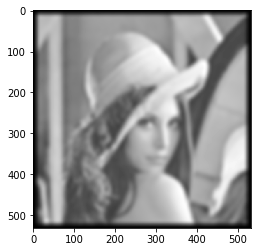

In [10]:
out = convolve2d(bw, W)
print(out.shape)
plt.imshow(out, cmap='gray')
plt.show()

(512, 512)


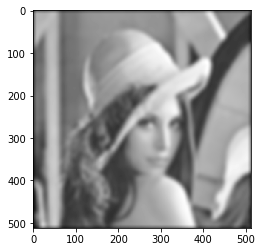

In [11]:
out = convolve2d(bw, W, mode='same')
print(out.shape)
plt.imshow(out, cmap='gray')
plt.show()

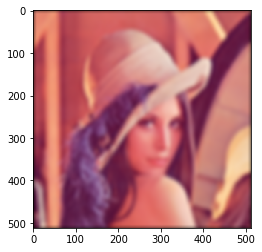

In [14]:
out3 = np.zeros(img.shape)
W2 = W
W2 = W2/W2.sum()
for i in range(3):
    out3[:,:,i] = convolve2d(img[:,:,i], W2, mode='same')
out4 = out3
out4 /= out4.max()
# print(out4)
# print(out4.shape)
plt.imshow(out4, cmap='gray')
plt.show()

## Take away
* Now you know that there are some possible filters that help us detect features. So, perhaps it would be possible to just do a convolution in neural network and use gradient descent to find the best possible fiters. 

* Generally, a convolutional layer transforms a set of feature-maps comming out of previous layer into an new set of feature-maps. The actual transforming work is performed by filters of this convolutional layer. A convolutional layer contains a stack of filters.
* More specifically, in a convolutional layer:
    * Each filter takes in feature-maps comming out of previous layer and generates/outputs an new feature (also called activation) map. Therefore, Filter and feature-map out have one-to-one relationship.
    * You define the number of filters and thus the number of feature-maps out.
    * Feature-maps comming out would be the input of the next (convolutional/pooling) layer. You can think of a feature-map as a filtered image comming out a filter.
    * Each filter has 3 dimensions: width, height and number of feature-maps comming in.
    * Therefore, convolutional layer has 4 dimensions formed by a stack of filters and the 4 dimensions are width, height, number of feature-maps comming in and number of feature-maps comming out.

## TensorFlow Convolution Layer

Let's examine how to implement a CNN in TensorFlow.

TensorFlow provides the <b style='color:red'>tf.nn.conv2d()</b> and <b style='color:red'>tf.nn.bias_add()</b> functions to create your own convolutional layers.

```python
# Output depth
k_output = 64

# Image Properties
image_width = 10
image_height = 10
color_channels = 3

# Convolution filter
filter_size_width = 5
filter_size_height = 5

# Input/Image
input = tf.placeholder(
    tf.float32,
    shape=[None, image_height, image_width, color_channels])

# Weight and bias
filter = tf.Variable(tf.truncated_normal(
    [filter_size_height, filter_size_width, color_channels, k_output]))
filter_bias = tf.Variable(tf.zeros(k_output))

# Apply Convolution
conv_layer = tf.nn.conv2d(input, filter, strides=[1, 2, 2, 1], padding='SAME')
# Add bias
conv_layer = tf.nn.bias_add(conv_layer, filter_bias)
# Apply activation function
conv_layer = tf.nn.relu(conv_layer)
```

As stated in TensorFlow [document](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d), <b style='color:red'>tf.nn.conv2d()</b> function computes a 2-D convolution given 4-D input and filter tensors and 4-D strides:

Specifically, Given 
* an <b style='color:red'>input tensor</b> of shape [batch, in_height, in_width, in_channels], 
* a <b style='color:red'>filter / kernel</b> tensor of shape [filter_height, filter_width, in_channels, out_channels], where out_channels is also the number filters defined in a convolutional layer 
* <b style='color:red'>strids</b> of shape [batch, in_height, in_width, in_channels]
* <b style='color:red'>padding</b> of either "SAME" or "VALID", determining type of padding algorithm to use.

this op performs the following:

1. Flattens the filter to a 2-D matrix with shape 
> [<b style='color:red'>filter_height \* filter_width \* in_channels</b>, output_channels].
2. Extracts image patches from the input tensor to form a virtual tensor of shape 
> [batch, out_height, out_width, <b style='color:red'>filter_height \* filter_width \* in_channels</b>].
3. For each patch, right-multiplies the filter matrix and the image patch vector.

In detail, with the default NHWC format,

```
output[b, i, j, k] =
    sum_{di, dj, q} input[b, strides[1] * i + di, strides[2] * j + dj, q] *
                    filter[di, dj, q, k]
```


> We are generally always going to set the stride for batch and in_channels (i.e. the first and fourth element in the strides array) to be 1. For the most common case of the same horizontal and vertices strides, <b style='color:red'>strides = [1, stride, stride, 1]</b>.

We will focus on changing in_height and in_width while setting batch and in_channels to 1. The in_height and in_width strides are for striding the filter over input. This example code uses a stride of 2 with 5x5 filter over input.
